# Word2vec

In [ ]:
!pip install --upgrade gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.3 MB/s eta 0:00:00


## Gerekli kütüphaneler

Bu uygulamada **önceden eğitilmiş kelime vektörlerini (word embeddings)** yüklemek ve sorgulamak için `gensim` kütüphanesini kullanacağız.  

Ayrıca notebook çıktısında gereksiz uyarıları azaltmak için `warnings` ayarını yapıyoruz.

**KeyedVectors** Önceden eğitilmiş word2vec/glove benzeri vektörleri yüklemek ve kullanmak için



In [ ]:
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Önceden Eğitilmiş Word2Vec Modelini Yükleme

Bu bölümde daha önce büyük bir metin korpusu üzerinde eğitilmiş Türkçe Word2Vec modelini yüklüyoruz.

**⚠️ Not:**
**Bu modeli biz eğitmedik. Büyük veri üzerinde eğitilmiş hazır bir embedding modelini kullanıyoruz.**

Bu sayede:
- Kelime benzerliklerini hesaplayabiliriz
- Analoji testleri yapabiliriz
- Cosine similarity ölçebiliriz



Model, **77270207 toplam kelimeden ve 257016 cümleden oluşan** bir korpus ile 5 kelimelik pencereler alınarak eğitilmiş ve her kelime için **400 boyut** vektörüdür.

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/2025-2026 Bahar Dönemi/Doğal Dil İşleme/Uygulamalar/5. Hafta Word2Vec/"
word2vec_model_path = ROOT_DIR + 'models/tr-word2veq-20190320'

KeyedVectors yalnızca embedding matrisini yükler.

Bu model artık eğitilmeyecek.

Sadece sorgulama (inference) yapacağız.

Yani:

**Bu bir sinir ağı değil artık.**
 **Bu, eğitilmiş ağırlık matrisidir.**

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

## Bir Kelimenin Vektörünü İnceleme

Word2Vec modelinde her kelime sabit uzunlukta bir vektör ile temsil edilir.

Bu hücrede:
- "bilgisayar" kelimesinin embedding vektörünü alıyoruz.
- Vektörün boyutunu (kaç özellikten oluştuğunu) inceliyoruz.

In [ ]:
vector = model['bilgisayar']
vector.shape

(400,)

## word_vec() Metodu ile Kelime Vektörü Alma

Word2Vec modelinde bir kelimenin vektörünü iki şekilde alabiliriz:

1. model['kelime']
2. model.word_vec('kelime')

Bu hücrede "türkiye" kelimesinin embedding vektörünü alıyoruz.

In [153]:
vector = model.word_vec('türkiye')
vector

array([ 3.17568511e-01, -9.35804397e-02,  7.37574577e-01, -3.43634701e+00,
        9.38692570e-01, -2.04461551e+00, -5.02523668e-02,  3.66668320e+00,
       -1.83963406e+00, -8.98532152e-01,  3.51648107e-02, -1.76088071e+00,
        1.35744706e-01,  4.59242240e-02, -6.87689304e-01, -1.31385696e+00,
        1.67679086e-01, -2.03507692e-01, -2.15162730e+00,  1.97436762e+00,
       -9.46044803e-01, -6.07081652e-01,  1.58208668e+00, -1.43397525e-01,
       -1.84543324e+00,  1.15331244e+00,  2.69546121e-01,  7.91229129e-01,
        2.03852987e+00, -3.47103477e-01, -1.30223180e-03, -2.13639188e+00,
       -2.09576309e-01, -5.60608804e-01,  9.27059576e-02,  7.00817108e-01,
       -6.51444435e-01, -1.38819814e-01,  1.27886891e+00, -1.88454998e+00,
        1.56975579e+00,  3.17268521e-01,  4.26650405e-01, -1.73579288e+00,
        2.86149919e-01, -1.60002977e-01, -1.30936062e+00, -1.52511299e+00,
       -2.53477931e+00, -1.57982135e+00, -1.32651103e+00,  4.61204112e-01,
        1.28819621e+00, -

## En Benzer Kelimeleri Bulma (most_similar)

Bu hücrede farklı kelimeler için modelin en benzer 3 kelimeyi bulmasını istiyoruz.

Amaç:
- Embedding uzayında hangi kelimeler birbirine yakın?
- Model anlamsal ilişkileri öğrenmiş mi?
- Bilinmeyen kelimelerde ne oluyor?

In [ ]:
test_list = ['kadın','macera','korku','virüs', 'başak','türkiye', 'üniversite', 'seminer', '']
for l in test_list:
    try:
        print("\n{} : ".format(l), model.most_similar(l,topn=3))
    except Exception as e:
        print("\nError: {}".format(e))


kadın :  [('erkek', 0.5522974729537964), ('kadin', 0.4619687795639038), ('bayan', 0.46176886558532715)]

macera :  [('aksiyon', 0.6567533612251282), ('korku', 0.6251124739646912), ('bilimkurgu', 0.5925045013427734)]

korku :  [('aksiyon', 0.647026538848877), ('dehşet', 0.6398845911026001), ('macera', 0.6251124739646912)]

virüs :  [('virüsler', 0.8140764236450195), ('virüsün', 0.7916213870048523), ('bakteri', 0.7802255153656006)]

başak :  [('köklükaya', 0.692254900932312), ('burçin', 0.6542049050331116), ('daşman', 0.6315826177597046)]

türkiye :  [('kktc', 0.5612117052078247), ('turkiye', 0.5222674608230591), ('kayseri', 0.4993126392364502)]

üniversite :  [('fakülte', 0.6544554233551025), ('üniversitenin', 0.6513085961341858), ('öğrenci', 0.6181179881095886)]

seminer :  [('seminerler', 0.8330506682395935), ('sempozyum', 0.7839311361312866), ('konferanslar', 0.7725836634635925)]

Error: "Key '' not present in vocabulary"


In [ ]:
result = model.similar_by_word("apple")
result

[('ios', 0.7119743227958679),
 ('android', 0.6762783527374268),
 ('app', 0.6758038401603699),
 ('iphone', 0.6655647158622742),
 ('icloud', 0.6512048840522766),
 ('ipod', 0.6401087641716003),
 ('macintosh', 0.6352086067199707),
 ('zune', 0.6342713236808777),
 ('blackberry', 0.6327864527702332),
 ('ibooks', 0.6327036619186401)]

## Analogy

## Vektör Toplama ile Anlamsal İlişki

Word2Vec'te kelime vektörleri matematiksel işlemlere tabi tutulabilir.

Bu hücrede:
- "kadın" ve "kral" kelimelerinin vektörlerini topluyoruz.
- Ortaya çıkan yeni vektöre en yakın kelimeyi buluyoruz.

Bu işlem embedding uzayında anlamsal kombinasyonları test etmemizi sağlar.

In [ ]:
result = model.most_similar(positive=['kadın', 'kral'])

print("{}: {:.4f}".format(*result[0]))

kraliçe: 0.5281


## Analoji Testi (Vector Arithmetic)

**kral - erkek + kadın = ?**

Amaç:
Modelin anlamsal ilişkileri geometrik olarak öğrenip öğrenmediğini test etmek.

In [ ]:
result = model.most_similar(positive=['kral','kadın'],negative=['erkek'])
print("{}: {:.4f}".format(*result[0]))

kraliçe: 0.4868


In [ ]:
result

[('kraliçe', 0.486796110868454),
 ('kralı', 0.47832587361335754),
 ('kralın', 0.44220858812332153),
 ('prens', 0.42895275354385376),
 ('hükümdar', 0.4103389382362366),
 ('kralların', 0.40440717339515686),
 ('kraliçesi', 0.3985658586025238),
 ('veliaht', 0.38295644521713257),
 ('norodom', 0.3751530647277832),
 ('krala', 0.3735838234424591)]

## Ülke – Başkent Analoji Testi

**almanya - berlin + paris = ?**

Amaç:
Modelin "ülke–başkent" ilişkisini öğrenip öğrenmediğini test etmek.

In [ ]:
result = model.most_similar(positive=['almanya','paris'],negative=['berlin'])
print("{}: {:.4f}".format(*result[0]))

fransa: 0.5754


In [ ]:
result

[('fransa', 0.5753956437110901),
 ('belçika', 0.4916689395904541),
 ('marsilya', 0.46258774399757385),
 ('ispanya', 0.4035399854183197),
 ('italya', 0.3970368802547455),
 ('hollanda', 0.3843022286891937),
 ('japonya', 0.3670513331890106),
 ('avrupa', 0.365658700466156),
 ('françois', 0.36299973726272583),
 ('lyon', 0.3582703173160553)]

## Fiil Çekimi Analoji Testi

**geliyor - gelmek + gitmek = ?**

Amaç:
Modelin fiil çekim yapısını (morfolojik ilişkiyi) öğrenip öğrenmediğini test etmek.

In [ ]:
model.most_similar(positive=["geliyor","gitmek"],negative=["gelmek"])

[('gidiyor', 0.597277045249939),
 ('gidiyorum', 0.5813120603561401),
 ('gidelim', 0.5487434267997742),
 ('geldik', 0.5480661988258362),
 ('gideceğim', 0.5473318099975586),
 ('geldim', 0.5455593466758728),
 ('indim', 0.5397135615348816),
 ('gittim', 0.5258768200874329),
 ('geçtim', 0.5209639668464661),
 ('gider', 0.5143941044807434)]

In [ ]:
result = model.most_similar(positive=['suşi','italya'],negative=['japonya'], topn=5)
print(result)

[('mozzarella', 0.5526099801063538), ('latte', 0.523548424243927), ('salata', 0.5164708495140076), ('peynir', 0.5116510987281799), ('makarna', 0.5052676200866699)]


In [ ]:
result = model.most_similar(positive=['pilot','kadın'],negative=['erkek'], topn=5)
print(result)

[('pilotu', 0.4168439507484436), ('sürücü', 0.36269816756248474), ('helikopter', 0.35423389077186584), ('pilotlar', 0.3508966565132141), ('pilotların', 0.3505897521972656)]


In [ ]:
model.most_similar(positive=["varank","teknoloji"])

[('inovasyon', 0.5045756101608276),
 ('tübitak', 0.4975109100341797),
 ('mühendislik', 0.4922029972076416),
 ('bilişim', 0.48821619153022766),
 ('fen', 0.4874119162559509),
 ('baysal', 0.48332440853118896),
 ('karolinska', 0.4755558967590332),
 ('bahçeşehir', 0.4731065630912781),
 ('karaalioğlu', 0.4690372347831726),
 ('tobb', 0.4686979055404663)]

## PLOT - 2D

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def plotWords(w2v, max_words=250, start_index=0, lim=None):
    # gensim 4: kelime listesi
    words = w2v.index_to_key  # en sık -> en az sıklığa doğru

    # vektörleri topla
    w2v_np = np.array([w2v[word] for word in words], dtype=np.float32)
    print("Shape =", w2v_np.shape)

    reduced = PCA(n_components=2).fit_transform(w2v_np)

    plt.figure(figsize=(18, 18))
    plt.rcParams.update({'font.size': 9})

    cnt = 0
    for i in range(start_index, len(words)):
        x, y = reduced[i]

        if lim is not None:
            if x > lim or y > lim or x < -lim or y < -lim:
                continue

        plt.scatter(x, y)
        plt.annotate(words[i], (x, y))
        cnt += 1
        if cnt >= max_words:
            break

    print("Plotted:", cnt)
    plt.show()


Shape = (426574, 400)
Plotted: 250


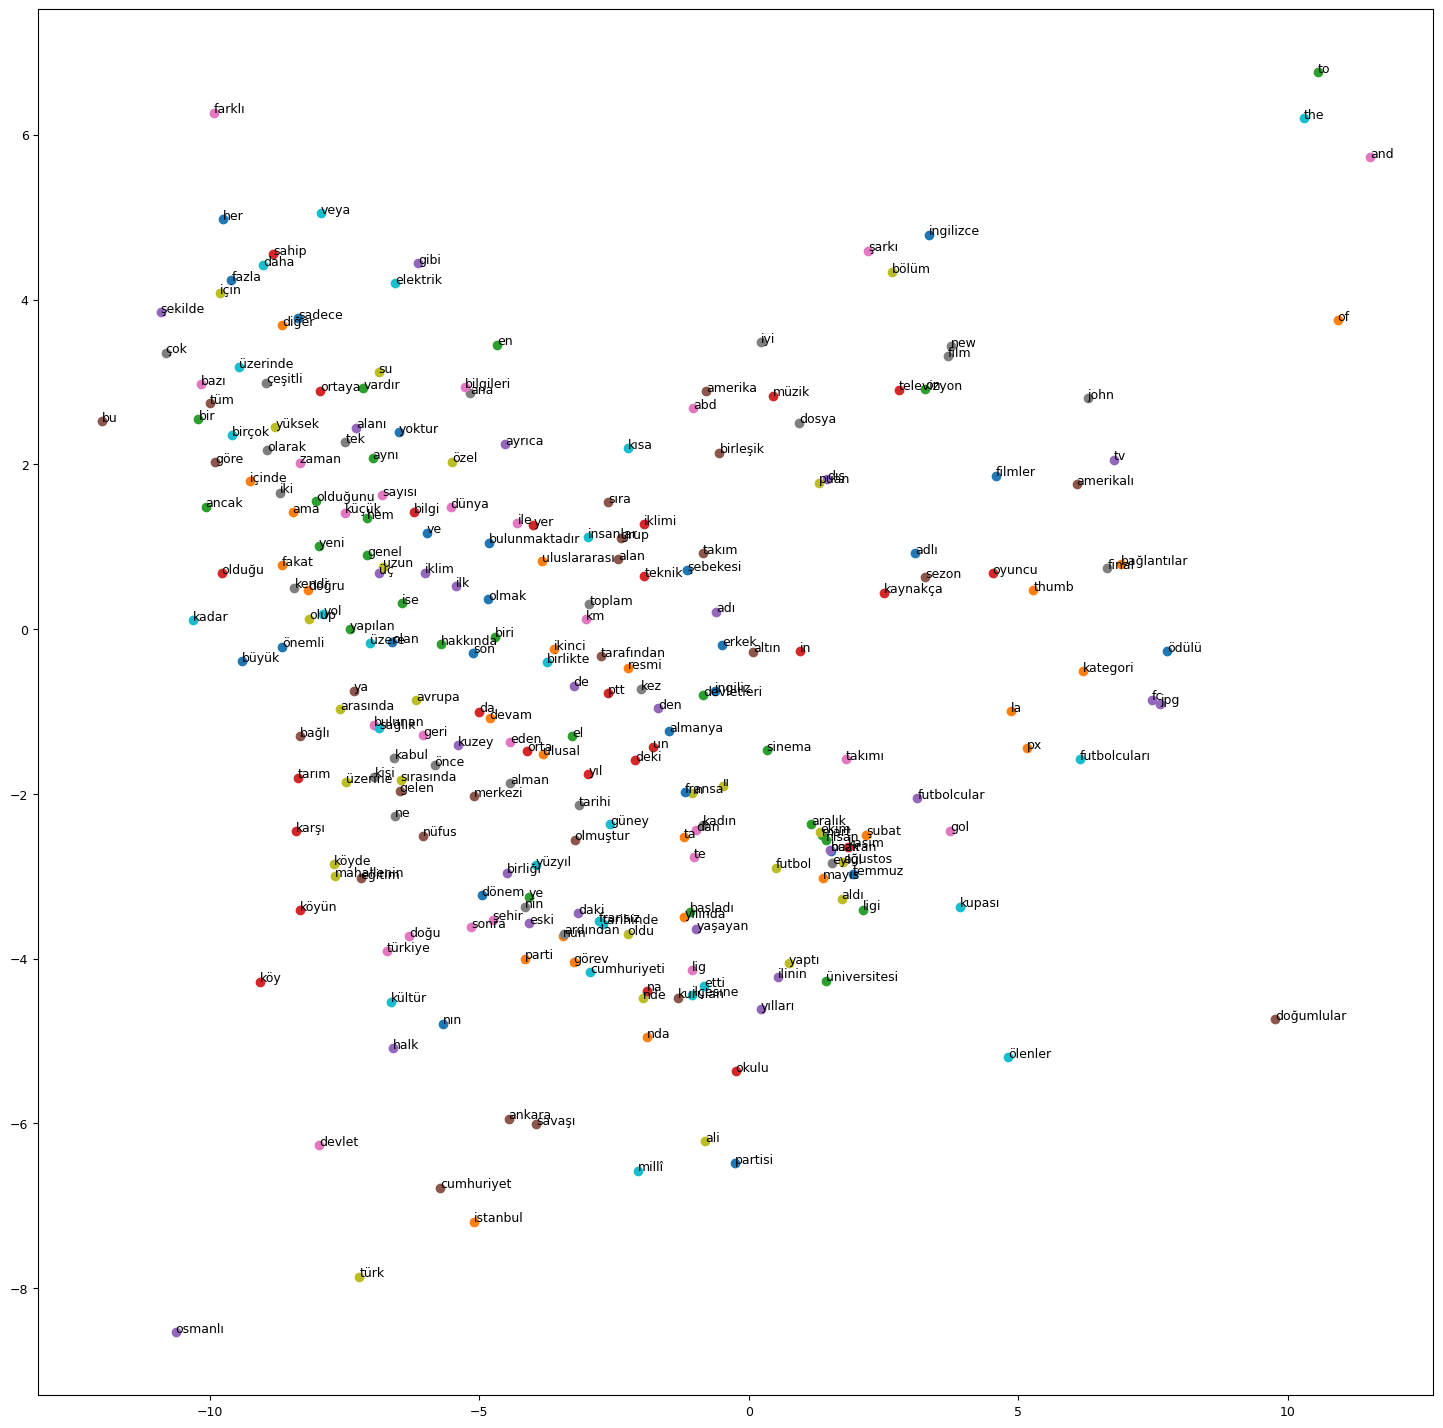

In [ ]:
#En sık 250 kelimeyi çiz
plotWords(model, max_words=250, start_index=0, lim=None)

## Veri Setini Yükleme ve Filtreleme

Bu bölümde:

1. Bir haber veri setini yüklüyoruz.
2. Sadece belirli kategorileri seçiyoruz.
3. Modelleme için gerekli sütunları ayırıyoruz.

Seçilen kategoriler:
- DÜNYA
- SPOR
- SANAT
- Teknoloji


In [101]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [103]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/naynco/nayn.data/master/classification_clean.csv")
main_categories = ['DÜNYA', 'SPOR','SANAT','Teknoloji']
filter = data["Categories"].isin(main_categories)
data = data[filter]
train_data = data[['Title', 'Categories']]
train_data.head()

,Title,Categories
12006,58 Saniyede Katar Meselesi? Katar krizi nedir?...,DÜNYA
12496,58 Saniyede Türkiye - Almanya Gerginliği,DÜNYA
12877,"Adriana Lima, Bomba Aşkla İlgili İlk Kez Konuş...",DÜNYA
12878,Galatasaraylı Taraftarlar Patladı: İstifa Edin,SPOR
12880,"Galatasaray'dan Ayrılan Sabri, Neredeyse Bedav...",SPOR


## Metin Ön İşleme Fonksiyonu

Bu fonksiyon bir haber başlığını temizler:

1. Küçük harfe çevirir.
2. Noktalama işaretlerini kaldırır.
3. Türkçe stopword'leri çıkarır.
4. Temizlenmiş metni geri döndürür.


In [106]:
import string
# Assuming unicode_tr comes from a specific library, import it here.
# For example: from some_turkish_nlp_lib import unicode_tr

def process_content(doc):
    #stemmer = TurkishStemmer()

    doc = unicode_tr(doc).lower()
    filter_punch = str.maketrans('', '', string.punctuation)
    stripped = doc.translate(filter_punch)

    clean_text = []
    for i in stripped.split():
        if i not in stopwords.words('turkish'):
            #clean_text.append(stemmer.stem(i))
            clean_text.append(i)

    return ' '.join(clean_text)

In [114]:
import numpy as np
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
#from TurkishStemmer import TurkishStemmer
from unicode_tr import unicode_tr

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, f1_score, roc_auc_score

import warnings; warnings.simplefilter('ignore')

## Ön İşleme Fonksiyonunu Veri Setine Uygulama

Bu adımda:

- Her haber başlığını `process_content()` fonksiyonundan geçiriyoruz.
- Temizlenmiş metni yeni bir sütunda saklıyoruz.

In [116]:
train_data['processed_title'] = train_data['Title'].apply(process_content)

In [117]:
train_data.head()

,Title,Categories,processed_title
12006,58 Saniyede Katar Meselesi? Katar krizi nedir?...,DÜNYA,58 saniyede katar meselesi katar krizi nedir v...
12496,58 Saniyede Türkiye - Almanya Gerginliği,DÜNYA,58 saniyede türkiye almanya gerginliği
12877,"Adriana Lima, Bomba Aşkla İlgili İlk Kez Konuş...",DÜNYA,adriana lima bomba aşkla ilgili ilk konuştu 35...
12878,Galatasaraylı Taraftarlar Patladı: İstifa Edin,SPOR,galatasaraylı taraftarlar patladı istifa edin
12880,"Galatasaray'dan Ayrılan Sabri, Neredeyse Bedav...",SPOR,galatasaraydan ayrılan sabri neredeyse bedavay...


## Özellik ve Etiket Ayrımı

Bu adımda:

- Kategorileri (etiketleri) ayrı bir değişkene alıyoruz.
- İşlenmiş başlıkları (özellikleri) ayrı bir değişkene alıyoruz.
- Toplam örnek sayısını hesaplıyoruz.

Bu yapı, makine öğrenmesi modeline veri vermeden önceki klasik hazırlık aşamasıdır.

In [118]:
categories = train_data['Categories']
titles = train_data['processed_title']
N = len(titles)
print('Number of news',N)

Number of news 11622


## Sınıf Sayısını Belirleme

Bu adımda:

- Veri setindeki benzersiz kategori isimlerini çıkarıyoruz.
- Toplam kaç farklı sınıf olduğunu hesaplıyoruz.

Bu bilgi:
- Çok sınıflı sınıflandırma (multi-class classification) kurarken gereklidir.

In [119]:
labels = list(set(categories))
n_classes = len(labels)
print('possible categories',labels)

possible categories ['SPOR', 'Teknoloji', 'DÜNYA', 'SANAT']


## Sınıf Dağılımını İnceleme

Bu adımda her kategoriye ait kaç haber olduğunu hesaplıyoruz.

Amaç:
- Veri seti dengeli mi?
- Bazı sınıflar çok baskın mı?
- Sınıflandırma modelinde bias oluşur mu?

Bu analiz, model eğitmeden önce yapılması gereken temel bir kontroldür.

In [120]:
for l in labels:
    print('number of ',l,' news',len(train_data.loc[train_data['Categories'] == l]))

number of  SPOR  news 1967
number of  Teknoloji  news 144
number of  DÜNYA  news 9226
number of  SANAT  news 285


In [121]:
train_data['Categories'].value_counts()

,count
Categories,
DÜNYA,9226
SPOR,1967
SANAT,285
Teknoloji,144


In [122]:
train_data

,Title,Categories,processed_title
12006,58 Saniyede Katar Meselesi? Katar krizi nedir?...,DÜNYA,58 saniyede katar meselesi katar krizi nedir v...
12496,58 Saniyede Türkiye - Almanya Gerginliği,DÜNYA,58 saniyede türkiye almanya gerginliği
12877,"Adriana Lima, Bomba Aşkla İlgili İlk Kez Konuş...",DÜNYA,adriana lima bomba aşkla ilgili ilk konuştu 35...
12878,Galatasaraylı Taraftarlar Patladı: İstifa Edin,SPOR,galatasaraylı taraftarlar patladı istifa edin
12880,"Galatasaray'dan Ayrılan Sabri, Neredeyse Bedav...",SPOR,galatasaraydan ayrılan sabri neredeyse bedavay...
...,...,...,...
43755,Save The Children: Bir nesil kaybolabilir,DÜNYA,save the children bir nesil kaybolabilir
43758,FIFA'dan Demirören'e üç yıl men cezası gelebilir,SPOR,fıfadan demirörene üç yıl men cezası gelebilir
43759,Hint düğününde sıra dışı davetiye: Düğün hediy...,DÜNYA,hint düğününde sıra dışı davetiye düğün hediye...
43761,Pelosi’den Trump’a: Olağanüstü hal ilanı kanun...,DÜNYA,pelosi’den trump’a olağanüstü hal ilanı kanuns...


In [125]:
model.most_similar("sabri")

[('hayri', 0.7187854647636414),
 ('şadi', 0.7089741230010986),
 ('muhittin', 0.7082790732383728),
 ('sarıoğlu', 0.7030647993087769),
 ('naci', 0.7001519799232483),
 ('hamit', 0.6993476152420044),
 ('şükrü', 0.6992080807685852),
 ('şevki', 0.6884646415710449),
 ('şefik', 0.6855399012565613),
 ('niyazi', 0.6850550770759583)]

In [126]:
model.vectors[0].shape[0]

400

## Cümle Vektörü Oluşturma (Mean Word Embedding)

Word2Vec kelime seviyesinde embedding üretir.

Ancak sınıflandırma yapabilmek için:
- Her cümleyi sabit uzunlukta bir vektöre dönüştürmemiz gerekir.

Bu fonksiyon:
1. Cümleyi tokenize eder.
2. Vocabulary’de olmayan kelimeleri çıkarır.
3. Kalan kelimelerin embedding’lerini alır.
4. Bu vektörlerin ortalamasını alarak cümle vektörünü üretir.

In [135]:
def get_mean_vector(sentence):
  tokens = nltk.word_tokenize(sentence)
  # remove out-of-vocabulary words
  words = [word for word in tokens if word in model] # Corrected from word2vec_model.wv to model.wv
  print("words", words)
  if len(words) >= 1:
    sentence_words_vectors = []
    for word in words:
      word_vector = model[word]
      sentence_words_vectors.append(word_vector)

    return np.mean(sentence_words_vectors, axis=0)
  else:
      return np.zeros(400)

In [136]:
train_data.iloc[0]['processed_title']

'58 saniyede katar meselesi katar krizi nedir video'

In [137]:
import nltk
nltk.download('punkt_tab')
get_mean_vector(train_data.iloc[0]['processed_title']).shape

words ['saniyede', 'katar', 'meselesi', 'katar', 'krizi', 'nedir', 'video']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


(400,)

## Cümle Vektörlerini Oluşturma

Bu adımda:

- Her işlenmiş başlık için cümle embedding'i üretiyoruz.
- `get_mean_vector()` fonksiyonunu tüm veri setine uyguluyoruz.
- Sonucu yeni bir sütunda saklıyoruz: `content_vector`

Artık her haber başlığı sabit uzunlukta bir sayısal vektör ile temsil ediliyor.

In [138]:
train_data["content_vector"] = train_data["processed_title"].apply(get_mean_vector)
train_data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
words ['abdde', 'boyutlu', 'yazıcıda', 'üretilen', 'silahın', 'kılavuzunun', 'internette', 'yayımlanmasına', 'yasal', 'engel']
words ['çinli', 'huawei', 'geçti']
words ['fıfa', 'türkiye', 'fiyatı', 'tl']
words ['çavuşoğlu', 'günde', 'görüşme']
words ['fenerbahçenin', 'istediği', 'fedor', 'smolov', 'dün', 'gece', 'ölümden', 'döndü']
words ['die', 'welt', 'erdoğan', 'protestolarla']
words ['muhalif', 'haber', 'kurumunda', 'çalışan', 'üç', 'gazeteci', 'pusuda', 'öldürüldü']
words ['venezuela', 'devlet', 'başkanı', 'maduro', 'üretim', 'çöktü', 'başarısız', 'olduk']
words ['eski', 'danışmanı', 'mahkeme', 'önünde']
words ['yaz', 'aylarında', 'turiste', 'boğulan', 'avrupa', 'durumdan', 'şikayetçi']
words ['facebook', 'seçim', 'öncesi', 'sahte', 'hesap', 'sayfaları', 'kapattı']
words ['eski', 'danışmanı', 'bannon', 'erdoğan', 'halifelik', 'kurmak', 'istiyor']
words ['tillerson', 'suudilerin', 'katarı', 'işgal', 'etmesini', 'engellediği', 'koltuğun

,Title,Categories,processed_title,content_vector
12006,58 Saniyede Katar Meselesi? Katar krizi nedir?...,DÜNYA,58 saniyede katar meselesi katar krizi nedir v...,"[-0.7447392, 0.5630992, -0.18004152, -0.417655..."
12496,58 Saniyede Türkiye - Almanya Gerginliği,DÜNYA,58 saniyede türkiye almanya gerginliği,"[0.3489056, 0.17642842, 0.6938498, -1.3411198,..."
12877,"Adriana Lima, Bomba Aşkla İlgili İlk Kez Konuş...",DÜNYA,adriana lima bomba aşkla ilgili ilk konuştu 35...,"[0.43284965, 0.122442596, 1.1601808, -0.806820..."
12878,Galatasaraylı Taraftarlar Patladı: İstifa Edin,SPOR,galatasaraylı taraftarlar patladı istifa edin,"[-0.7407109, 0.11303361, 0.3375501, -0.1223526..."
12880,"Galatasaray'dan Ayrılan Sabri, Neredeyse Bedav...",SPOR,galatasaraydan ayrılan sabri neredeyse bedavay...,"[0.07546139, 0.12305242, 0.4047278, -0.0668554..."
...,...,...,...,...
43755,Save The Children: Bir nesil kaybolabilir,DÜNYA,save the children bir nesil kaybolabilir,"[0.22785683, 0.34656668, 0.47403717, 0.1845709..."
43758,FIFA'dan Demirören'e üç yıl men cezası gelebilir,SPOR,fıfadan demirörene üç yıl men cezası gelebilir,"[-0.7248087, 0.025390148, 0.8531462, -1.178610..."
43759,Hint düğününde sıra dışı davetiye: Düğün hediy...,DÜNYA,hint düğününde sıra dışı davetiye düğün hediye...,"[0.1981782, -0.58978856, 0.22571608, -0.559332..."
43761,Pelosi’den Trump’a: Olağanüstü hal ilanı kanun...,DÜNYA,pelosi’den trump’a olağanüstü hal ilanı kanuns...,"[0.3815193, -0.2949682, 0.18852918, -0.3920468..."


## Özellik Matrisi (Feature Matrix) Oluşturma

Bu adımda:

- Tüm cümle embedding'lerini tek bir numpy matrisinde topluyoruz.
- Her satır bir haber başlığını temsil ediyor.
- Her sütun embedding boyutundaki bir özelliği temsil ediyor.

Sonuçta elde ettiğimiz yapı:
X → (örnek sayısı × embedding boyutu)

In [139]:
X = np.zeros((11622, 400))

for i in range(len(data)):
  X[i] = train_data.iloc[i]["content_vector"]

X.shape

(11622, 400)

## Kategori Etiketlerini Sayısal Hale Getirme

Makine öğrenmesi modelleri metin etiketleri doğrudan kullanamaz.

Bu nedenle:
- Kategori isimlerini (DÜNYA, SPOR, vb.)
- Sayısal etiketlere dönüştürüyoruz.

Bu işlem için `LabelEncoder` kullanıyoruz.

In [140]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


le.fit(train_data['Categories'])

y = le.transform(train_data['Categories'])

y

array([0, 0, 0, ..., 0, 0, 0])

## Eğitim ve Test Verisine Bölme

Makine öğrenmesinde modeli değerlendirebilmek için:

- Verinin bir kısmı eğitim (train)
- Bir kısmı test (test)

olarak ayrılır.

Bu adımda:
- Verinin %80'i eğitim için
- %20'si test için ayrılıyor.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=34)

## Lineer SVM ile Metin Sınıflandırma

Bu adımda:

- Ortalama Word2Vec vektörlerini kullanarak
- Lineer çekirdekli (linear kernel) bir SVM modeli eğitiyoruz.

Amaç:
Cümle embedding’lerinden kategori tahmini yapmak.

In [142]:
SVM = SVC(kernel="linear")

text_clf = SVM.fit(X_train, y_train)

In [143]:
predicted = text_clf.predict(X_test)

## Confusion Matrix (Karmaşıklık Matrisi)

Confusion matrix, modelin tahminlerini sınıf bazında özetler:

- Satırlar: Gerçek etiketler (y_test)
- Sütunlar: Model tahminleri (predicted)

Köşegen (diagonal) hücreler doğru tahminleri gösterir.
Köşegen dışı hücreler ise modelin hangi sınıfları birbirine karıştırdığını gösterir.

In [144]:
confusion_matrix(y_test,predicted)

array([[1753,   19,   55,   18],
       [  37,   20,    2,    1],
       [  66,    1,  326,    1],
       [  21,    0,    0,    5]])

In [145]:
print('accuracy_score',accuracy_score(y_test,predicted))

accuracy_score 0.9049462365591397


## Classification Report

Bu rapor her sınıf için:

- Precision
- Recall
- F1-score
- Support (örnek sayısı)

değerlerini gösterir.

In [146]:
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

        SPOR       0.93      0.95      0.94      1845
   Teknoloji       0.50      0.33      0.40        60
       DÜNYA       0.85      0.83      0.84       394
       SANAT       0.20      0.19      0.20        26

    accuracy                           0.90      2325
   macro avg       0.62      0.58      0.59      2325
weighted avg       0.90      0.90      0.90      2325



## 5-Fold Cross Validation (Eğitim Verisi Üzerinde)

- Eğitim verisini 5 parçaya bölüyoruz.
- Her seferinde 4 parça ile modeli eğitiyoruz.
- 1 parça ile doğrulama yapıyoruz.
- 5 farklı skor elde ediyoruz.

Amaç:
Modelin farklı veri bölünmelerinde ne kadar stabil çalıştığını görmek.

In [156]:
cross_val_score(text_clf,X_train, y_train, cv=5)

array([0.90913978, 0.90645161, 0.91178053, 0.89671867, 0.90155998])

## Yeni Başlık Tahmini Yapma

Bu fonksiyon:

1. Yeni başlığı alır.
2. Ön işleme uygular.
3. Cümle embedding üretir.
4. Eğitilmiş SVM modeli ile kategori tahmini yapar.

Amaç:
Eğitilmiş modeli gerçek bir örnek üzerinde test etmek.

In [148]:
def predict_title(model, new_data):
    test_data = pd.DataFrame(new_data, columns=['Title'])
    test_data['processed_title'] = test_data['Title'].apply(process_content)

    X_test = test_data['processed_title']
    print(X_test)
    predictions = model.predict(X_test)
    print("predictions", predictions)

    return predictions

## Yeni Bir Haber Başlığı İçin Tahmin (Inference)

Bu hücrede eğitilmiş sınıflandırıcıyı gerçek bir örnek üzerinde deniyoruz.

Akış:
1) Yeni başlığı al
2) `process_content()` ile temizle
3) `get_mean_vector()` ile 400 boyutlu cümle vektörü üret
4) SVM modeli ile tahmin yap
5) Sayısal etiketi tekrar kategori adına çevir (`inverse_transform`)

In [152]:
t1 = ["Adriana Lima, Bomba Aşkla İlgili İlk Kez Konuş..."]
news_title_df = pd.DataFrame(t1, columns=['Title'])

# Apply the processing pipeline directly in this cell
processed_title = news_title_df['Title'].apply(process_content)

# Convert the processed title (string) into a numerical vector
# Note: get_mean_vector returns a 1D array, but predict expects a 2D array (e.g., [1, 400])
X_new = np.array([get_mean_vector(title) for title in processed_title])

# Make the prediction using the trained classifier
predictions = text_clf.predict(X_new)

# Decode the numerical prediction back to the original category label
decoded_predictions = le.inverse_transform(predictions)

print("Predictions (numerical label):", predictions)
print("Predicted Category:", decoded_predictions[0])

words ['adriana', 'lima', 'bomba', 'aşkla', 'ilgili', 'ilk', 'konuş']
Predictions (numerical label): [0]
Predicted Category: DÜNYA
